In [1]:
#引入pandas库
import pandas as pd

In [2]:
#使用pandas读取csv数据
prepare_prior = pd.read_csv('order_products__prior.csv')
prepare_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [3]:
prepare_train = pd.read_csv('order_products__train.csv')
prepare_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [4]:
# merge 这两张表
prepare_pt = prepare_prior.merge(prepare_train,how='outer')
prepare_pt.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
# 使用 groupby 和 count() t计算每个order的product的总数
order_product_num = prepare_pt.groupby('order_id').count()
order_product_num.head()

,product_id,add_to_cart_order,reordered
order_id,,,
1,8,8,8
2,9,9,9
3,8,8,8
4,13,13,13
5,26,26,26


In [6]:
# formulate the 'order_product_num' table, in order to merge with the orders.csv table
order_product_num.drop(['add_to_cart_order','reordered'],axis=1,inplace=True)
# modify the column name 'product_id' to 'product_count'
order_product_num = order_product_num.rename(columns={'product_id':'product_count'})
order_product_num.head()

,product_count
order_id,
1,8
2,9
3,8
4,13
5,26


In [7]:
orders_raw = pd.read_csv('orders.csv')
orders_raw.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date
0,2539329,1,prior,1,2,8,-1.0,20160105
1,2398795,1,prior,2,3,7,15.0,20160120
2,473747,1,prior,3,3,12,21.0,20160210
3,2254736,1,prior,4,4,7,29.0,20160310
4,431534,1,prior,5,4,15,28.0,20160407


In [8]:
orders_raw = orders_raw.merge(order_product_num, how='inner',on='order_id')
orders_raw.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,product_count
0,2539329,1,prior,1,2,8,-1.0,20160105,5
1,2398795,1,prior,2,3,7,15.0,20160120,6
2,473747,1,prior,3,3,12,21.0,20160210,5
3,2254736,1,prior,4,4,7,29.0,20160310,5
4,431534,1,prior,5,4,15,28.0,20160407,8
5,3367565,1,prior,6,2,7,19.0,20160426,4
6,550135,1,prior,7,1,9,20.0,20160516,5
7,3108588,1,prior,8,1,14,14.0,20160530,6
8,2295261,1,prior,9,1,16,0.0,20160530,6
9,2550362,1,prior,10,3,8,30.0,20160629,9


In [39]:
orders=orders_raw.drop(['order_id','eval_set','order_number'],axis=1)
orders.head(10)

,user_id,order_dow,order_hour_of_day,days_since_prior_order,order_date,product_count
0,1,2,8,-1.0,20160105,5
1,1,3,7,15.0,20160120,6
2,1,3,12,21.0,20160210,5
3,1,4,7,29.0,20160310,5
4,1,4,15,28.0,20160407,8
5,1,2,7,19.0,20160426,4
6,1,1,9,20.0,20160516,5
7,1,1,14,14.0,20160530,6
8,1,1,16,0.0,20160530,6
9,1,3,8,30.0,20160629,9


In [10]:
#根据order_date来排序
orders = orders.sort_values('order_date', inplace=False)
orders

,user_id,order_dow,order_hour_of_day,days_since_prior_order,order_date,product_count
3058067,188506,5,16,10.0,20160101,15
2443702,150384,5,9,-1.0,20160101,6
2443344,150361,5,10,6.0,20160101,12
1604966,98519,5,19,3.0,20160101,11
2442300,150307,5,10,7.0,20160101,14
2442093,150299,5,14,12.0,20160101,15
2441829,150285,5,13,3.0,20160101,15
1604767,98514,5,16,1.0,20160101,8
1605659,98548,5,20,7.0,20160101,15
2440578,150208,5,10,-1.0,20160101,16


In [11]:
dow =[5]
od_record = 5
for orders_dow in orders['order_dow']:  
    if orders_dow == od_record:
        continue
    else:
        dow.append(orders_dow)
    od_record = orders_dow
dow

[5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 1,
 2,


In [12]:
# #将dow赋给表中的order_dow
# product_count_sum['order_dow']=dow
# product_count_sum

In [13]:
#根据order_date将多行数据统一
orders = orders.groupby('order_date').sum()


In [14]:
orders

,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_count
order_date,,,,,
20160101,637733110,32880,87990,68433.0,66793
20160102,664002613,41184,92502,69461.0,69348
20160103,704973498,50743,97874,73967.0,74928
20160104,729899306,7525,100688,77540.0,77118
20160105,744965569,15506,104163,80287.0,77458
20160106,804360145,24885,112052,85469.0,84157
20160107,855453642,35156,118437,90039.0,89620
20160108,901595980,47055,127208,95997.0,95676
20160109,968755114,60114,134916,102479.0,102387


In [15]:
#将dow赋给表中的order_dow
orders['order_dow']=dow
orders

,user_id,order_dow,order_hour_of_day,days_since_prior_order,product_count
order_date,,,,,
20160101,637733110,5,87990,68433.0,66793
20160102,664002613,6,92502,69461.0,69348
20160103,704973498,7,97874,73967.0,74928
20160104,729899306,1,100688,77540.0,77118
20160105,744965569,2,104163,80287.0,77458
20160106,804360145,3,112052,85469.0,84157
20160107,855453642,4,118437,90039.0,89620
20160108,901595980,5,127208,95997.0,95676
20160109,968755114,6,134916,102479.0,102387


In [16]:
import math
X=orders.drop(['product_count', 'order_hour_of_day', 'user_id'],axis=1)
Y=orders['product_count']

In [17]:
from sklearn.decomposition import PCA
transfer = PCA(n_components=0.90)
xT = transfer.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=22)

In [19]:
# Standard the data using standardScalar
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor

In [22]:
estimator = LinearRegression()
estimator.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print("coef:", estimator.coef_)
print("intercept:", estimator.intercept_)

coef: [-30.65446151   0.98744237]
intercept: 197.77441967846244


In [24]:
y_predict = estimator.predict(x_test)
print(y_predict)

[8.90793935e+04 7.94359000e+04 4.06993920e+04 2.93776402e+04
 5.92812575e+04 5.44643386e+04 1.56142355e+05 7.70570639e+04
 1.61380736e+05 4.91292312e+04 3.16484952e+04 6.10003509e+04
 1.61026245e+05 6.13815912e+04 4.73476588e+03 3.69265934e+04
 1.18004543e+05 1.55421653e+05 7.59560518e+03 4.89329052e+04
 6.19334840e+04 1.36964249e+05 8.81144435e+04 9.46880224e+04
 1.14486067e+05 3.33372404e+04 9.66390335e+04 1.42468420e+04
 1.58801154e+04 8.84729726e+04 5.46471467e+04 7.29444539e+04
 1.21164227e+05 6.35863313e+04 6.93394330e+04 6.47052785e+04
 1.39212830e+05 1.39421949e+05 1.31314016e+05 8.69967463e+04
 9.89526548e+04 1.30065706e+04 5.16136800e+04 1.54027166e+05
 6.51525899e+04 1.85925679e+05 3.07205531e+02 4.46600671e+04
 3.19696764e+04 1.10303305e+05 5.35630225e+04 1.57999690e+05
 7.94152512e+04 4.39976682e+04 1.20275485e+05 5.56671747e+04
 1.05737371e+05 1.24416006e+05 1.26632727e+05 9.21670383e+04
 2.16399980e+04 3.51805765e+04 6.86025823e+04 4.74206913e+01
 6.44420362e+03 1.249031

In [25]:
print(x_test)

            order_dow  days_since_prior_order
order_date                                   
20160613            1                 90043.0
20160707            4                 80370.0
20161030            7                 41234.0
20161205            1                 29582.0
20160824            3                 59928.0
20160925            7                 55174.0
20160226            5                158083.0
20160716            6                 78023.0
20160212            5                163388.0
20161008            6                 49740.0
20161127            7                 32068.0
20160901            4                 61700.0
20160205            5                163029.0
20160823            2                 62024.0
20170115            7                  4812.0
20161115            2                 37258.0
20160411            1                119336.0
20160216            2                157260.0
20170110            2                  7554.0
20161011            2             

In [26]:
# 确定x_x里面的值只有orderdow就行
import numpy as np
x_x=x_test['order_dow']
x_x = np.array(x_x)
x_x

array([1, 4, 7, 1, 3, 7, 5, 6, 5, 6, 7, 4, 5, 2, 7, 2, 1, 2, 2, 2, 4, 5,
       6, 2, 6, 2, 6, 6, 5, 4, 4, 4, 4, 7, 1, 3, 1, 6, 7, 4, 5, 7, 5, 7,
       3, 3, 4, 6, 1, 5, 2, 6, 2, 2, 5, 4, 5, 1, 3, 3, 2, 7, 6, 6, 3, 3,
       2, 1, 3, 7, 4, 2, 2, 3, 7, 3, 6, 6, 1, 6, 3, 3, 6, 1, 7, 3, 4, 1,
       6, 7, 3, 7, 4, 5, 5, 1, 4, 2, 7, 4, 4, 2, 3, 5, 5, 2, 1, 7, 7, 6,
       5, 6, 4, 6, 3, 6, 5, 3, 1])

In [27]:
score = estimator.score(x_test, y_test)
score

0.9997392932251432

In [28]:
from sklearn import metrics
r2S = metrics.r2_score(y_test,y_predict)
r2S

0.9997392932251432

In [29]:
import numpy as np
MSE = np.square(np.subtract(y_test,y_predict)).mean()
MSE


626213.727816968

In [30]:
MSE2 = metrics.mean_squared_error(y_test,y_predict) 
MSE2

626213.7278169685

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.lines import Line2D

In [32]:
type(y_predict)

numpy.ndarray

In [33]:
bar_table = pd.DataFrame({
    'order_dow':x_x,
    'product_prediction':y_predict
})
bar_table

,order_dow,product_prediction
0,1,89079.393474
1,4,79435.900024
2,7,40699.391963
3,1,29377.640211
4,3,59281.257514
5,7,54464.338630
6,5,156142.354630
7,6,77057.063853
8,5,161380.736414
9,6,49129.231242


In [34]:
bar_y_choose_prepare = bar_table.groupby('order_dow').sum()
bar_y_choose_prepare

,product_prediction
order_dow,
1,1.155858e+06
2,1.093093e+06
3,1.372258e+06
4,1.192093e+06
5,1.613191e+06
6,1.691443e+06
7,1.311225e+06


In [35]:
y_lable_value=bar_y_choose_prepare['product_prediction']
y_lable_value

order_dow
1    1.155858e+06
2    1.093093e+06
3    1.372258e+06
4    1.192093e+06
5    1.613191e+06
6    1.691443e+06
7    1.311225e+06
Name: product_prediction, dtype: float64

In [36]:
x_label_value=[1,2,3,4,5,6,7]
x_label_value

[1, 2, 3, 4, 5, 6, 7]

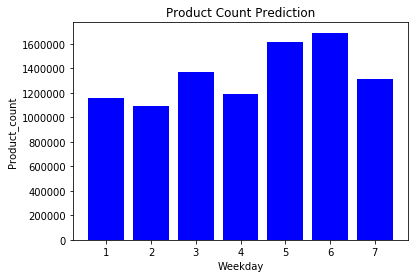

In [37]:
plt.bar(x_label_value, y_lable_value, fc='b')
plt.title("Product Count Prediction")
plt.xlabel("Weekday")
plt.ylabel("Product_count")
plt.show()

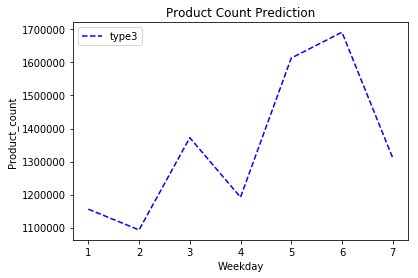

In [38]:
plt.plot(x_label_value, y_lable_value,'b--', label='type3')
plt.title('Product Count Prediction')
plt.xlabel('Weekday')
plt.ylabel('Product_count')
plt.legend()
plt.show()